In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [278]:
train= pd.read_csv('G:/Data Science/ITI Data Anaysis/intro to ML/Bick share/train.csv')
test=  pd.read_csv('G:/Data Science/ITI Data Anaysis/intro to ML/Bick share/test.csv')

In [279]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [280]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


Drop the columns `casual` and `registered` to match the test set

In [281]:
train.drop(columns=['casual','registered'],axis=1,inplace=True)

In [282]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [283]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


There is No **Nulls**

In [284]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In `holiday` 75% of the column is zeros and 25% of `workingday` also zeros  

In [285]:
#display unique values 
train.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
count           822
dtype: int64

# Train Data Pre-processing

In [286]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [287]:
train.datetime = pd.to_datetime(train.datetime)

In [289]:
train['year']=train.datetime.dt.year
train['day'] =train.datetime.dt.day
train['hour']=train.datetime.dt.hour
train['month']=train.datetime.dt.month
train['weekday']=train.datetime.dt.weekday


In [290]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  year        10886 non-null  int64         
 11  day         10886 non-null  int64         
 12  hour        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  weekday     10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 1.2 MB


In [291]:
train.drop(columns=['datetime'],axis=1,inplace=True)

In [292]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,day,hour,month,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,0,1,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,2,1,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,3,1,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4,1,5


# Train set EDA

[Text(0.5, 1.0, 'Count of Bicks During Holiday and Normal Days')]

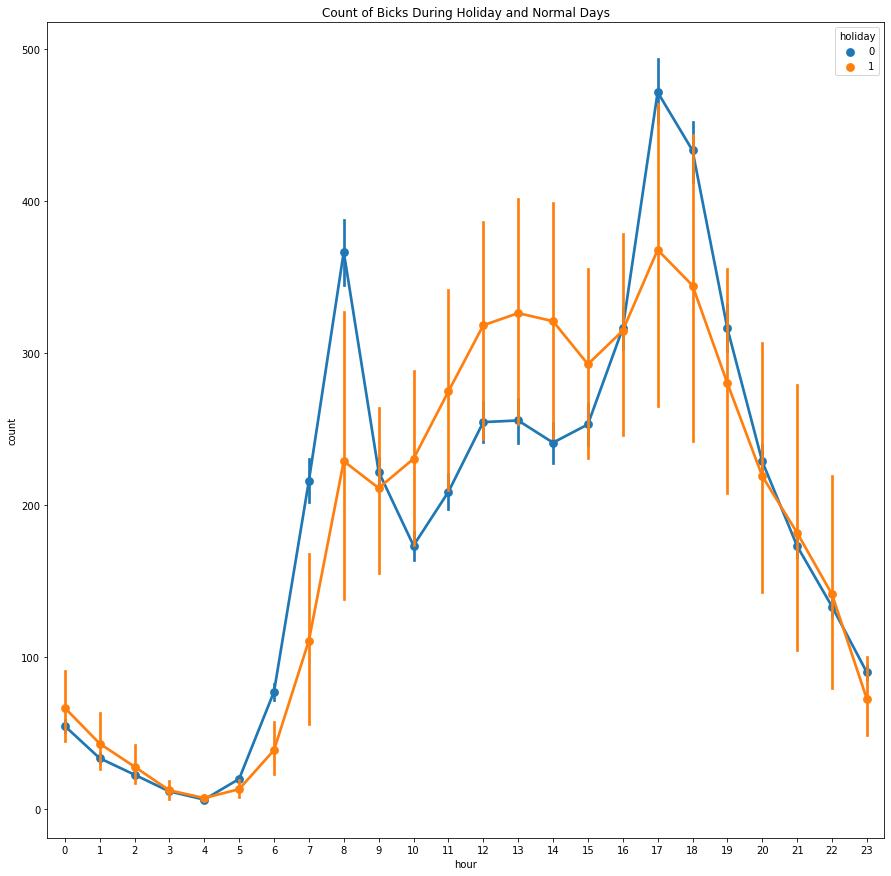

In [293]:
fig, ax = plt.subplots(figsize=(15,15))
sns.pointplot(data=train,x='hour',y='count',hue='holiday',ax=ax)
ax.set(title='Count of Bicks During Holiday and Normal Days')

- as shown in the point plot, the count of rented bicks decrease at the first hours of the day at dawn and last hours at night ,
and increses starting from 7 am then decreases in the afternoon then the count increases in the evening 
- also, it says that in holidays the count of rented bicks at afternoons is highr than in normal days

[Text(0.5, 1.0, 'Count of Bicks During seasons')]

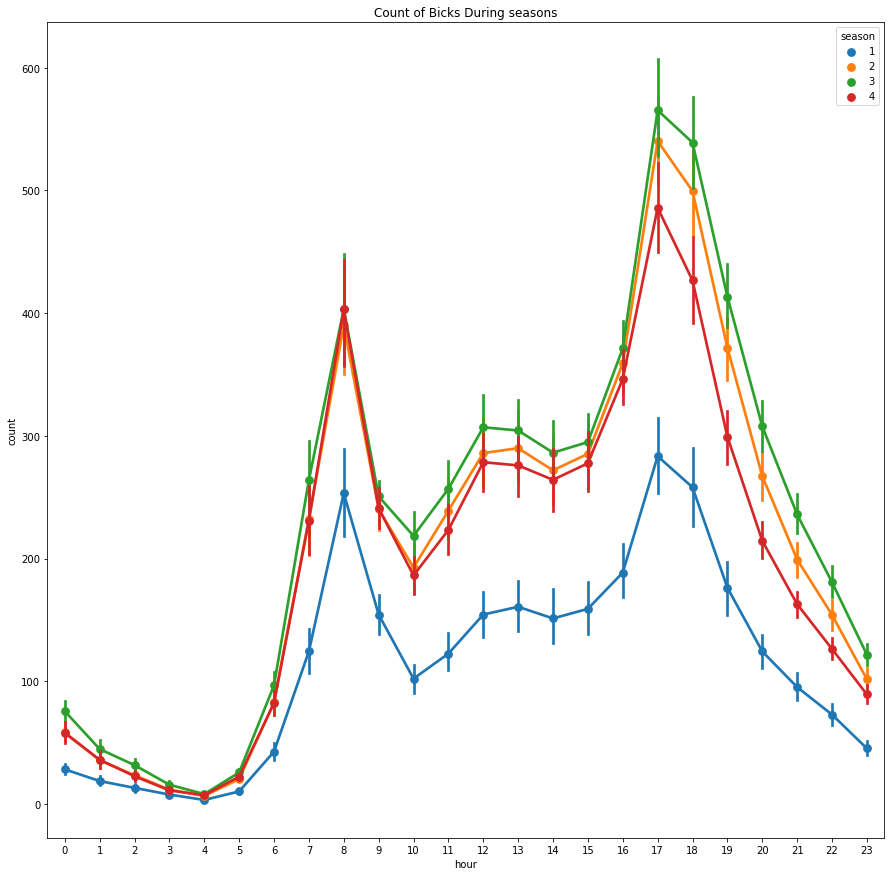

In [294]:
fig, ax = plt.subplots(figsize=(15,15))
sns.pointplot(data=train,x='hour',y='count',hue='season',ax=ax)
ax.set(title='Count of Bicks During seasons')

- this also says that rent rate is higher in spring summer more than in winter 

[Text(0.5, 1.0, 'Count of Bicks in each Month')]

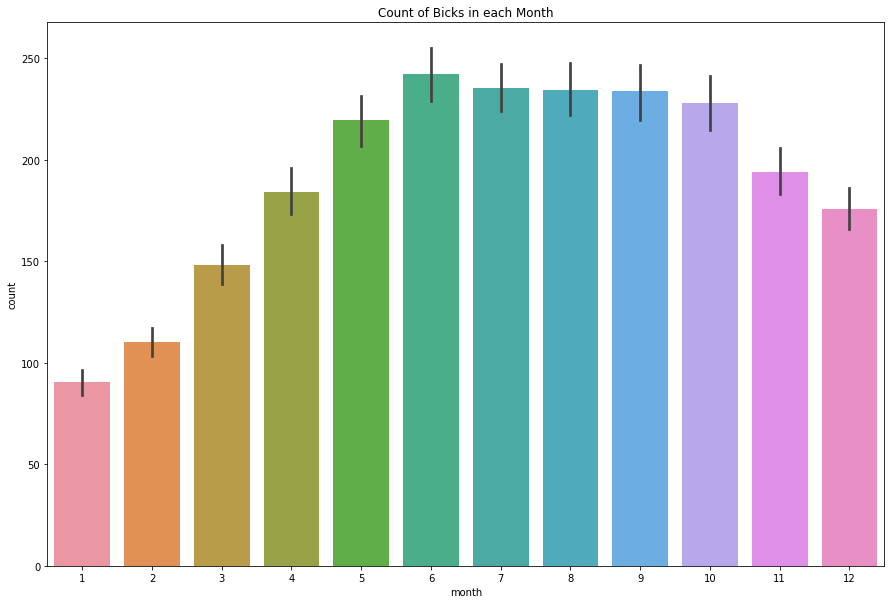

In [295]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=train,x='month',y='count',ax=ax)
ax.set(title='Count of Bicks in each Month')

[Text(0.5, 1.0, 'Count of Bicks in each Weekday')]

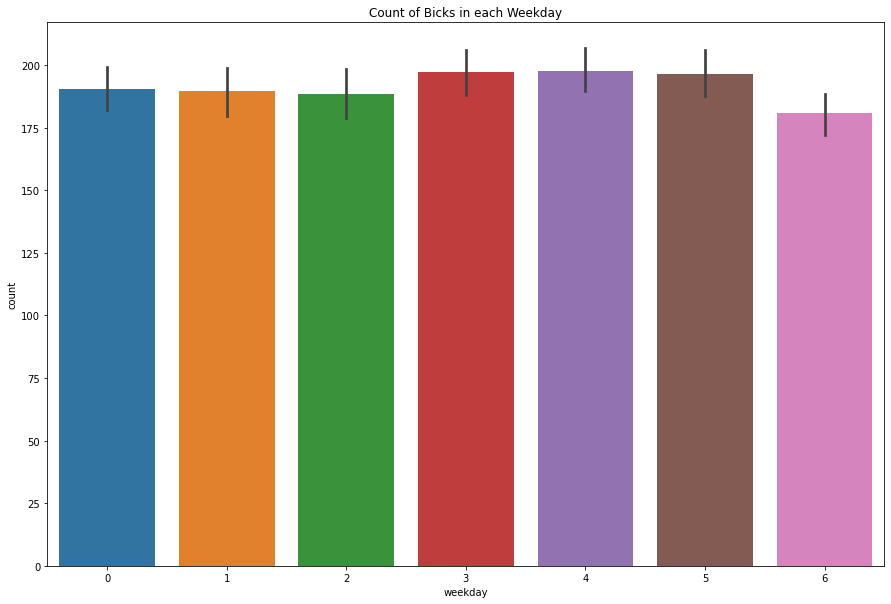

In [296]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=train,x='weekday',y='count',ax=ax)
ax.set(title='Count of Bicks in each Weekday')

In [297]:
numerical = train[['temp','atemp', 'humidity', 'windspeed', 'count']]

In [300]:
def boxplot_hist(df, column):
    plt.subplot(1, 2, 1) 
    plt.boxplot(df[column])
    plt.title(column)
    plt.ylabel(column)

    plt.subplot(1, 2, 2) 
    plt.hist(df[column])
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency ')
    plt.tight_layout()
    plt.show()

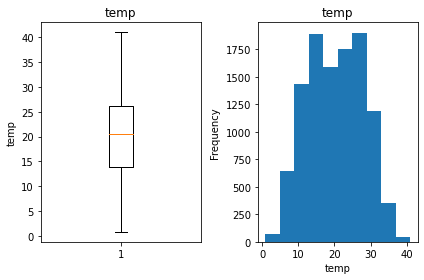

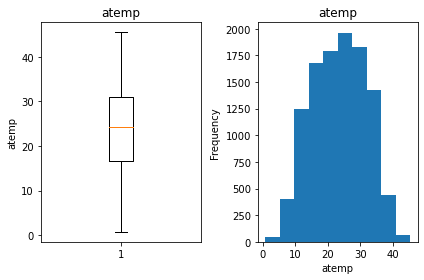

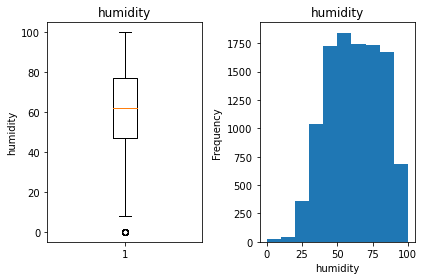

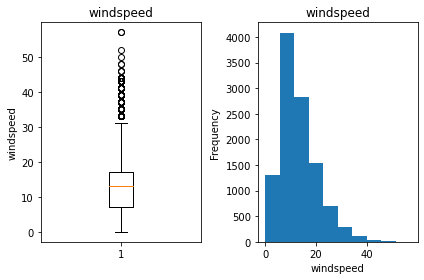

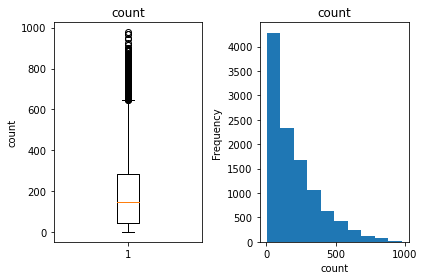

In [244]:
for i in numerical:
    boxplot_hist(train, i)

`windspeed` skewed to the right and contains outliers `count` is skewed to the left with few outliers   

# Feature Engineering

<AxesSubplot:>

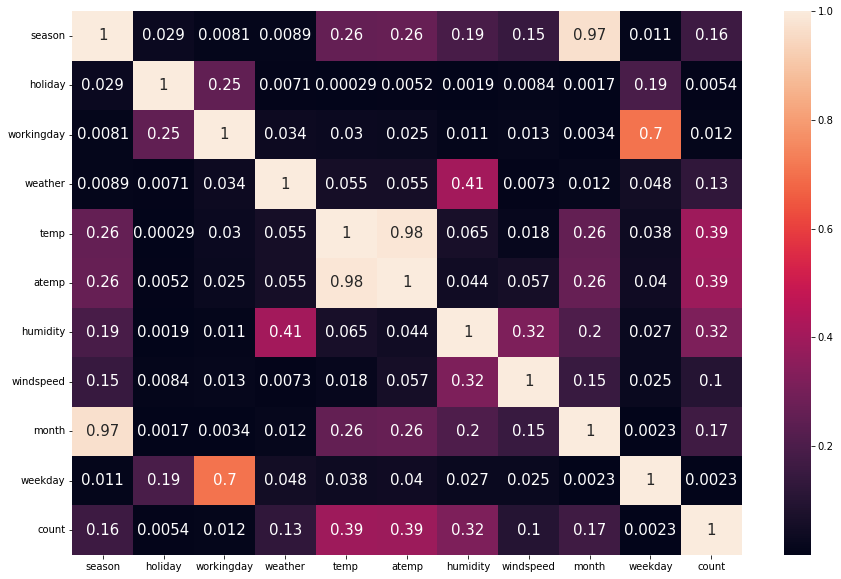

In [301]:
corr= train[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed','month','weekday','count']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(abs(corr),annot=True,annot_kws={'size':15})

- `month` & `season`--> `month` higher correlation with `count`  
- `weekday` & `workingday` --> `workingday` higher correlation with `count`  
- `temp` & `atemp` --> `temp`  higher correlation with `count`  


c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Rents')

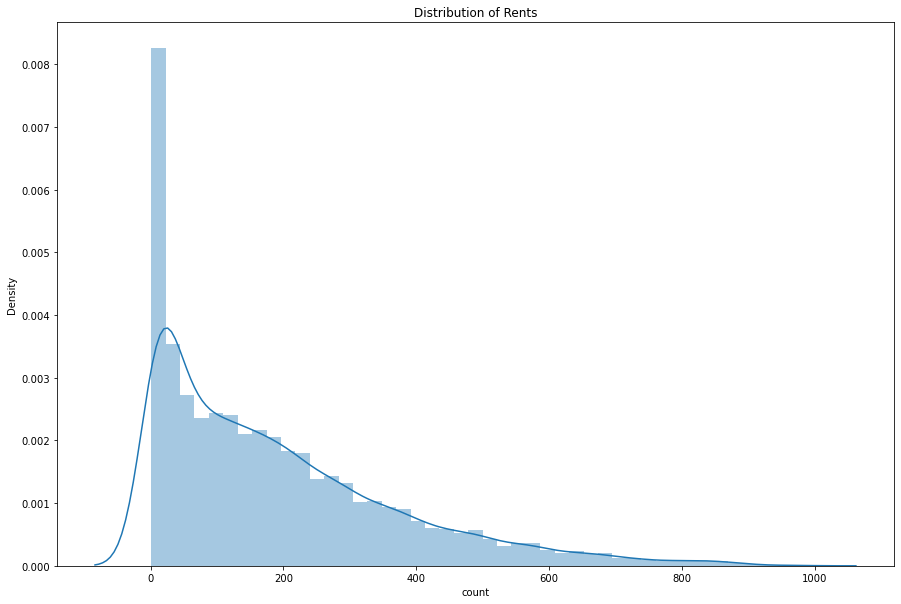

In [302]:
plt.figure(figsize=(15,10))
sns.distplot(train['count'])
plt.title('Distribution of Rents')

In [303]:
# count log transformation
count_log = np.log(train['count'])

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Rents After Log')

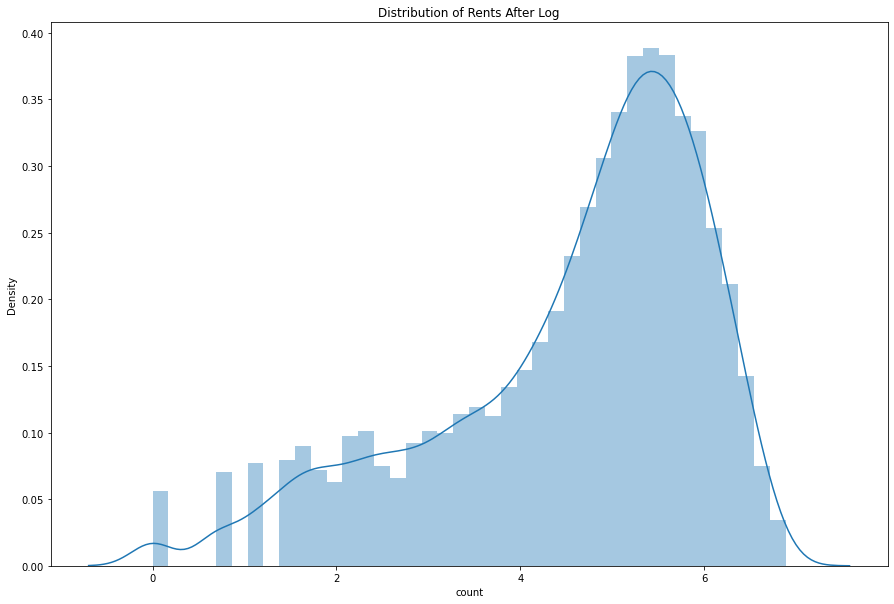

In [304]:
plt.figure(figsize=(15,10))
sns.distplot(count_log)
plt.title('Distribution of Rents After Log')

In [305]:
#count boxcox transformation 
from scipy.stats import boxcox
count_boxcox = boxcox(train['count'], 0.4)

<AxesSubplot:title={'center':'Distribution of Rents Count'}, xlabel='Count', ylabel='Frequency'>

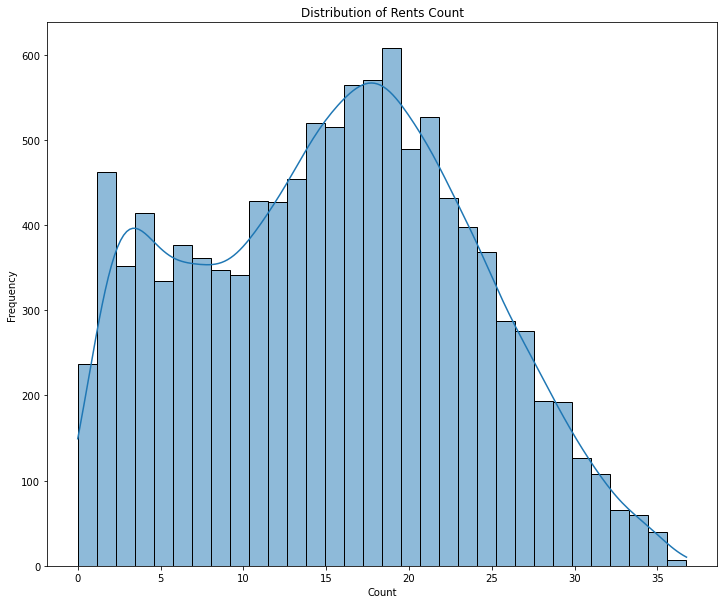

In [306]:
fig, ax = plt.subplots(1,1, figsize=(12, 10))
ax.set_ylabel("Frequency")
ax.set_xlabel("Count")
ax.set_title("Distribution of Rents Count")

sns.histplot(count_boxcox, kde=True, ax=ax) # Transforming target variable using boxcox transformation

In [307]:
print("Untransformed Skew:", train["count"].skew())
print("Log transformed Skew:",count_log.skew())
print("Boxcox transformed Skew:",pd.Series(count_boxcox).skew())

Untransformed Skew: 1.2420662117180776
Log transformed Skew: -0.9712277227866112
Boxcox transformed Skew: 0.03882675519533804


accourding to the skew score , boxcox transformation has the lowest skewness 

In [308]:
train['count']= pd.Series(count_boxcox)

In [309]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,day,hour,month,weekday
0,1,0,0,1,9.84,14.395,81,0.0,5.078583,2011,1,0,1,5
1,1,0,0,1,9.02,13.635,80,0.0,8.433621,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,7.500000,2011,1,2,1,5
3,1,0,0,1,9.84,14.395,75,0.0,4.474569,2011,1,3,1,5
4,1,0,0,1,9.84,14.395,75,0.0,0.000000,2011,1,4,1,5


- remove the highely correlated features with each other ( `day` , `atemp` , `season` , `weekday` ) from the trained data 
- change date types of categorical feaures `month` , `year` , `workingday` , `holiday`, `weather` and get dummies for them
- normalize the numerical features `temp` , `humidity` , `windspeed` 


In [310]:
# Convert categorical columns 'month', 'day', hour', 'weather', 'year' to string data.
train['month'] = train['month'].apply(str)
train['workingday'] = train['workingday'].apply(str)
train['hour'] = train['hour'].apply(str)
train['weather'] = train['weather'].apply(str)
train['year'] = train['year'].apply(str)
train['holiday'] = train['holiday'].apply(str)
train.dtypes

season          int64
holiday        object
workingday     object
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count         float64
year           object
day             int64
hour           object
month          object
weekday         int64
dtype: object

In [311]:
# remove the highely correlated features with each other ( `day` , `atemp` , `season` , `weekday` ) from the trained data 
train.drop(columns=['day' , 'atemp' , 'season' , 'weekday' ],axis=1, inplace=True )

In [312]:
# Get the dummies columns for categorical columns.

cat_cols = train.select_dtypes(include=["object"]).columns.tolist()
print(cat_cols)
train_dummies = pd.get_dummies(train, columns = cat_cols)
train_dummies.columns 

['holiday', 'workingday', 'weather', 'year', 'hour', 'month']


Index(['temp', 'humidity', 'windspeed', 'count', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'year_2011', 'year_2012', 'hour_0', 'hour_1', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_2', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'month_1', 'month_10', 'month_11', 'month_12',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9'],
      dtype='object')

In [313]:
# Drop 1st dummy column for each category
train_dummies = train_dummies.drop(['workingday_0',
                                                    'year_2011',
                                                    'weather_1', 
                                                    'month_1', 
                                                    'hour_0', 
                                                   'holiday_0'], axis=1)

In [314]:
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 44 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          10886 non-null  float64
 1   humidity      10886 non-null  int64  
 2   windspeed     10886 non-null  float64
 3   count         10886 non-null  float64
 4   holiday_1     10886 non-null  uint8  
 5   workingday_1  10886 non-null  uint8  
 6   weather_2     10886 non-null  uint8  
 7   weather_3     10886 non-null  uint8  
 8   weather_4     10886 non-null  uint8  
 9   year_2012     10886 non-null  uint8  
 10  hour_1        10886 non-null  uint8  
 11  hour_10       10886 non-null  uint8  
 12  hour_11       10886 non-null  uint8  
 13  hour_12       10886 non-null  uint8  
 14  hour_13       10886 non-null  uint8  
 15  hour_14       10886 non-null  uint8  
 16  hour_15       10886 non-null  uint8  
 17  hour_16       10886 non-null  uint8  
 18  hour_17       10886 non-nu

In [315]:
numeric_col = ['temp','humidity','windspeed']
for i in numeric_col:
    train_dummies[i] = (train_dummies[i]-train_dummies[i].min())/(train_dummies[i].max()-train_dummies[i].min())
    


In [316]:
train_dummies

,temp,humidity,windspeed,count,holiday_1,workingday_1,weather_2,weather_3,weather_4,year_2012,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,0.224490,0.81,0.000000,5.078583,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.204082,0.80,0.000000,8.433621,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.204082,0.80,0.000000,7.500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.224490,0.75,0.000000,4.474569,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.224490,0.75,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0.367347,0.50,0.456213,23.113901,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
10882,0.346939,0.57,0.263195,19.925742,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
10883,0.326531,0.61,0.263195,16.911707,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
10884,0.326531,0.61,0.105325,14.965294,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


# Linear Regression Model

In [317]:
x= train_dummies.drop(['count'],axis=1)
y=train_dummies['count']


In [318]:
from sklearn.model_selection import train_test_split
x_train , x_valid,y_train, y_valid = train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.linear_model import LinearRegression 
model= LinearRegression() 
model.fit(x_train,y_train)
y_pred = model.predict(x_valid) 

In [319]:
# Import mean_squared_log_error from sklearn.metrics
from sklearn.metrics import mean_squared_log_error
# Calculate MSLE
msle = mean_squared_log_error(y_valid, abs(y_pred))
# Print MSLE
print(msle)

0.12618603731197134


# Lasso Regression Model

In [321]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold 

In [322]:
# Define cross-validation method
cv = RepeatedKFold(n_splits=20, n_repeats=10, random_state=1)

# Define lasso regression model with cross-validation
model = LassoCV(alphas=np.arange(0.01, 1, 0.01), cv=cv)

# Fit lasso regression model on data
model.fit(x_train, y_train)
y_pred = model.predict(x_valid) 
# Display optimal alpha value and coefficients
print(model.alpha_)
print(model.coef_)

0.01
[11.6673851  -2.94781425 -0.82127164 -0.12229092 -0.09511713 -0.2054692
 -2.96739771 -0.          3.2588705  -4.58987281  4.05114507  5.01941435
  6.20884213  6.24285974  5.60878414  5.80765378  8.18419291 12.42048077
 11.83475199  8.92328561 -5.88926224  6.09809036  4.06446893  2.58669151
  0.14353205 -7.84153641 -8.40057449 -5.46735978 -0.16479306  5.83827768
 10.91588638  6.61209216  2.86656418  2.87780024  2.75232714 -0.
  0.          0.81155246  1.90101352  1.01699902 -0.          0.2845817
  1.29469959]


just to explain how this code works ;)

- First, we define a cross-validation method using RepeatedKFold class. This class splits the data into 7 folds and repeats the process 5 times with different random seeds. This helps us to find a more robust estimate of the optimal alpha value for lasso regression.
- Next, we define a lasso regression model with cross-validation using LassoCV class. This class takes two arguments: alphas and cv. alphas is an array of possible values for alpha that we want to test. We use arange function from numpy to generate an array of values from 0.01 to 1 with a step size of 0.01. cv is the cross-validation method that we defined earlier.
- Then, we fit the lasso regression model on the data using fit method. This method finds the best alpha value and coefficients for lasso regression based on cross-validation scores.
- Finally, we display the optimal alpha value and coefficients using print statements. The optimal alpha value is stored in model.alpha_ attribute and the coefficients are stored in model.coef_ attribute.

In [324]:
msle = mean_squared_log_error(y_valid, abs(y_pred))
# Print MSLE
print('Lasso Regression MSLE', msle)

Lasso Regression MSLE 0.1266176636236723


# Support Victor Regressor Model

In [326]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [327]:
# Create and fit SVR model with RBF kernel
svr = SVR(kernel="rbf")
svr.fit(x_train, y_train)

# Predict on test set
y_pred = svr.predict(x_valid) 

In [328]:
msle = mean_squared_log_error(y_valid, abs(y_pred))
# Print MSLE
print('SVR MSLE', msle)

SVR MSLE 0.06344052072990847


# Random Forest Regressor Model

In [329]:
from sklearn.ensemble import RandomForestRegressor

In [330]:
# Create and fit a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100) # Number of trees
rf_model.fit(x_train, y_train)

# Make predictions on test set
y_pred = rf_model.predict(x_valid)

In [331]:
msle = mean_squared_log_error(y_valid, abs(y_pred))
# Print MSLE
print('RF MSLE', msle)

RF MSLE 0.058992105358013004


# conclusion 
- Random Forest model has the least mean squared log error **0.059**

# Test Set Preperation

In [332]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [333]:
test.datetime = pd.to_datetime(test.datetime)

In [334]:
test['year']=test.datetime.dt.year
test['day'] =test.datetime.dt.day
test['hour']=test.datetime.dt.hour
test['month']=test.datetime.dt.month
test['weekday']=test.datetime.dt.weekday

In [335]:
# Convert categorical columns 'month', 'day', hour', 'weather', 'year' to string data.
test['month'] = test['month'].apply(str)
test['workingday'] = test['workingday'].apply(str)
test['hour'] = test['hour'].apply(str)
test['weather'] = test['weather'].apply(str)
test['year'] = test['year'].apply(str)
test['holiday'] = test['holiday'].apply(str)

In [336]:
# remove the highely correlated features with each other ( `day` , `atemp` , `season` , `weekday` ) from the tested data 
test.drop(columns=['day' , 'atemp' , 'season' , 'weekday' ],axis=1, inplace=True )

In [337]:
# Get the dummies columns for categorical columns.
test_dummies = pd.get_dummies(test, columns = cat_cols)
test_dummies.columns 

Index(['datetime', 'temp', 'humidity', 'windspeed', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'year_2011', 'year_2012', 'hour_0', 'hour_1', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_2', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'month_1', 'month_10', 'month_11', 'month_12',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9'],
      dtype='object')

In [338]:
# Drop 1st dummy column for each category
test_dummies = test_dummies.drop(['workingday_0',
                                                    'year_2011',
                                                    'weather_1', 
                                                    'month_1', 
                                                    'hour_0', 
                                                   'holiday_0'], axis=1)

In [339]:
test_dummies.head()

,datetime,temp,humidity,windspeed,holiday_1,workingday_1,weather_2,weather_3,weather_4,year_2012,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,2011-01-20 00:00:00,10.66,56,26.0027,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-20 01:00:00,10.66,56,0.0000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-20 02:00:00,10.66,56,0.0000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-20 03:00:00,10.66,56,11.0014,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-20 04:00:00,10.66,56,11.0014,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [340]:
x_test= test_dummies.drop(['datetime'],axis=1)
count_pred = rf_model.predict(x_test)

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of count predicted')

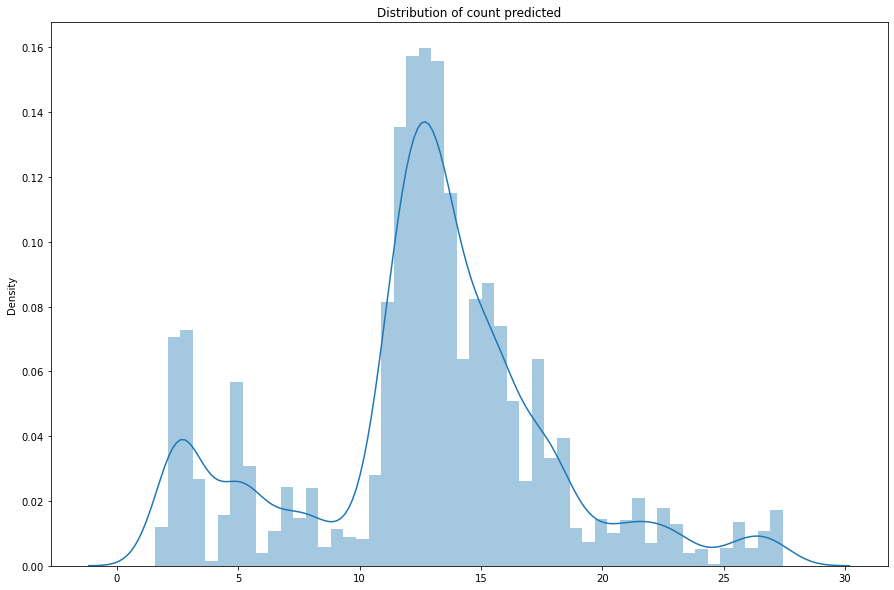

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(count_pred)
plt.title('Distribution of count predicted')

To apply the inverse Box-Cox transformation, you can use the scipy.
special.inv_boxcox function, which takes two arguments: y (the transformed data) and lmbda (the power parameter of the Box-Cox transform)

In [343]:
# Apply inverse Box-Cox transformation
from scipy import special
count_pre = special.inv_boxcox(count_pred,0.4)

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of count predicted after inverse trans')

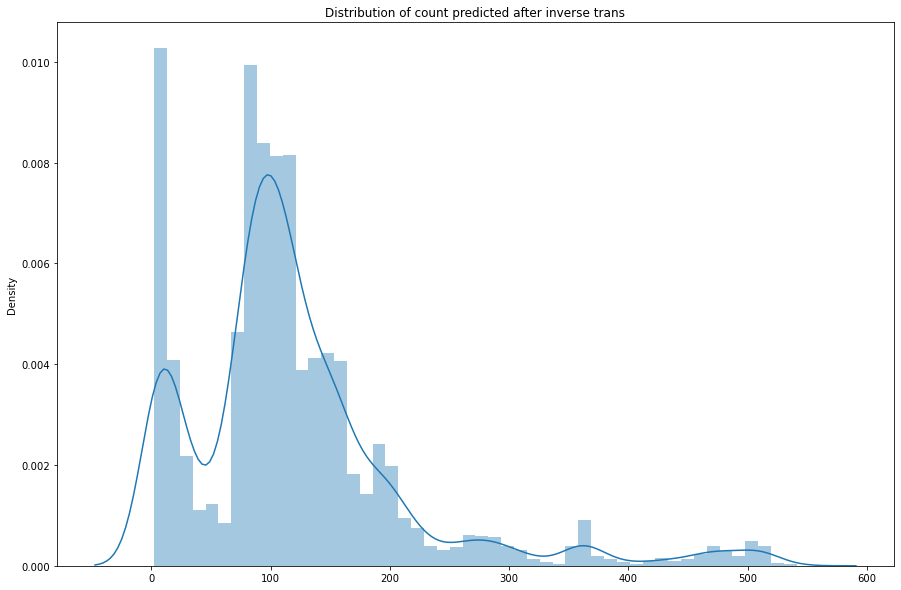

In [344]:
plt.figure(figsize=(15,10))
sns.distplot(count_pre)
plt.title('Distribution of count predicted after inverse trans')

In [346]:
test_dummies['count']=pd.Series(count_pre)

In [347]:
final_sub=test_dummies.loc[:,["datetime","count"]].to_csv('G:/Data Science/ITI Data Anaysis/intro to ML/Bick share/final_submission.csv',index=False)